In [6]:
import dynamic_pricing.db.db_utils as db
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
df: pd.DataFrame = db.load_order_data("nostimo")
print(df.info)

2024-02-12 10:38:32,053 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2024-02-12 10:38:32,055 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-02-12 10:38:32,251 INFO sqlalchemy.engine.Engine select current_schema()
2024-02-12 10:38:32,251 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-02-12 10:38:32,448 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2024-02-12 10:38:32,450 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-02-12 10:38:32,679 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-12 10:38:32,687 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

analysis

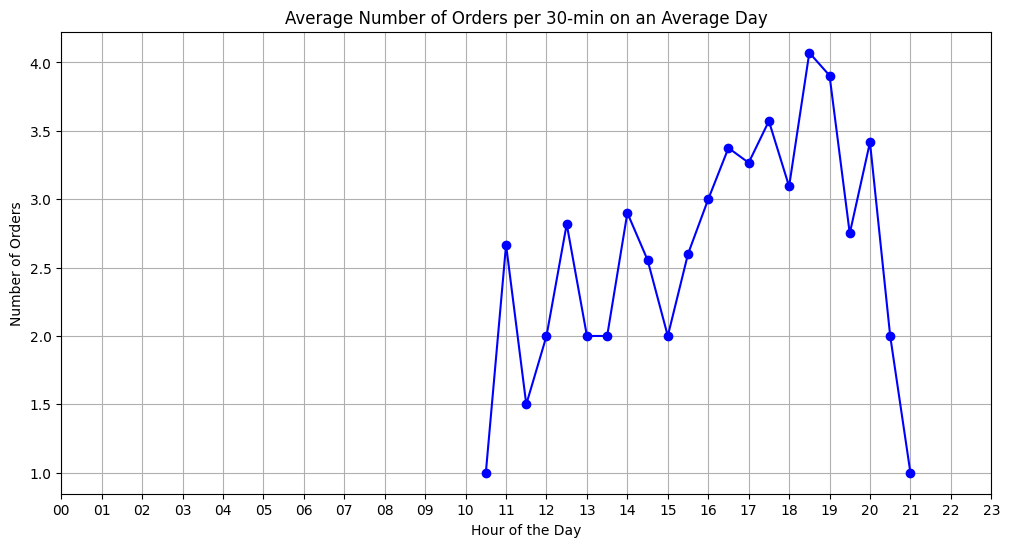

In [7]:
def plot_average_orders_per_interval(df,interval):
    df["order_datetime"] = df["order_placed_timestamp"]
    # Calculate the total number of intervals in a day based on the given interval
    num_intervals = int(24 * 60 / interval)

    # Create a new column for the interval index
    df['interval_index'] = (df['order_datetime'].dt.hour *
                                    60 + df['order_datetime'].dt.minute) // interval

    # Calculate the actual average number of orders for each interval on an average day
    actual_average_orders = df.groupby(
        ['interval_index', df['order_datetime'].dt.date]).size().groupby('interval_index').mean()

    # Generate the x-axis labels for the hour of the day
    x_labels = [f"{hour:02d}" for hour in range(24)]

    # Convert the index to a NumPy array
    index_array = actual_average_orders.index.to_numpy()

    # Plotting the expected orders per interval
    plt.figure(figsize=(12, 6))
    plt.plot(index_array, actual_average_orders.values,
                marker='o', linestyle='-', color='blue', markersize=6)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Orders')
    plt.title(
        f'Average Number of Orders per {interval}-min on an Average Day')
    plt.xticks(range(0, num_intervals, int(60 / interval)),
                x_labels)
    plt.grid(True)
    plt.show()

plot_average_orders_per_interval(df,interval=30)

In [8]:
def plot_average_revenue_per_interval(df, interval):
    # Calculate the total number of intervals in a day based on the given interval
    num_intervals = int(24 * 60 / interval)

    # Create a new column for the interval index
    df['interval_index'] = (df['order_datetime'].dt.hour *
                                    60 + df['order_datetime'].dt.minute) // interval

    # Calculate the actual average revenue for each interval on an average day
    df['revenue'] = df["order_total_price"]/100
    actual_average_revenue = df.groupby(['interval_index', df['order_datetime'].dt.date])[
        'revenue'].sum().groupby('interval_index').mean()

    # Generate the x-axis labels for the hour of the day
    x_labels = [f"{hour:02d}" for hour in range(24)]

    # Convert the index to a NumPy array
    index_array = actual_average_revenue.index.to_numpy()

    # Plotting the average revenue per interval
    plt.figure(figsize=(12, 6))
    plt.plot(index_array, actual_average_revenue.values,
                marker='o', linestyle='-', color='blue', markersize=6)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Revenue')
    plt.title(f'Average Revenue per {interval}-min on an Average Day')
    plt.xticks(range(0, num_intervals, int(60 / interval)),
                x_labels)
    plt.grid(True)
    plt.show()

plot_average_revenue_per_interval(df,30)

KeyError: 'order_total_price'

plot_average_orders_per_interval(30)
plot_products_sold()
plot_average_orders_by_day_of_week()
plot_average_revenue_per_interval(30)
plot_average_revenue_by_day_of_week()